In [1]:
import numpy as np
import polymer_pl as pp
import matplotlib.pyplot as plt

temperature = 300  # K

l1 = [9.555, 1.453, 2.516, 1.443, 2.516, 1.453]
Angle1 = np.array([-3.94, 3.94, 16.5, 14.8, -14.8, -16.5])
rotation1 = [0, 1, 0, 2, 0, 1]
l2 = [9.554, 1.457, 2.529, 1.435, 2.529, 1.457]
Angle2 = np.array([-3.94, 3.94, 16.5, 14.8, -14.8, -16.5])
rotation2 = [0, 1, 0, 3, 0, 1]

dihedral1 = np.array([[0, 0], [10, 0.55136], [20, 2.36295], [30, 5.5398],
                      [40, 10.13443], [50, 15.93678], [60, 22.55304],
                      [70, 29.06429], [80, 34.44656], [90, 37.20333],
                      [100, 35.96935], [110, 30.6921], [120, 24.54843],
                      [130, 18.48352], [140, 13.25878], [150, 9.18925],
                      [160, 6.3012], [170, 4.69965], [180, 4.25331]])

dihedral2 = np.array([[0, 0], [10, -0.05251], [20, 0.07877], [30, 0.84016],
                      [40, 2.52048], [50, 5.19849], [60, 8.58539],
                      [70, 12.15607], [80, 15.09663], [90, 16.33061],
                      [100, 15.41168], [110, 12.75993], [120, 9.58308],
                      [130, 6.66877], [140, 4.46335], [150, 3.28188],
                      [160, 3.07184], [170, 3.41315], [180, 3.6757]])
dihedral3 = np.array([[0, 0], [10, 0.35121], [20, 1.31553], [30, 2.58819],
                      [40, 3.94374], [50, 5.27387], [60,
                                                     6.59253], [70, 7.8466],
                      [80, 8.84198], [90, 9.30816], [100, 9.05052],
                      [110, 7.88779], [120, 6.29461], [130, 4.90559],
                      [140, 4.70062], [150, 6.00636], [160, 8.71128],
                      [170, 12.21398], [180, 14.8315]])

labels = {
    1: {'data': dihedral1, 'color': 'b'},
    2: {'data': dihedral2, 'color': 'm'},
    3: {'data':dihedral3, 'color': 'c'},
}

In [2]:
p1 = pp.PolymerPersistence(l1, Angle1, temperature, rotation1, labels)
p2 = pp.PolymerPersistence(l2, Angle2, temperature, rotation2, labels)
p1.report()
p2.report()

-------------- Calculation Report -------------
Temperature: 300 K
Max Eigenvalue (lambda_max): 0.895577739445
Correlation Length: 9.067313
Persistence Length Geometric (Angstroms): 169.984118
Persistence Length WLC (Angstroms): 166.710310
Conformational Parameter: 1.623874
-----------------------------------------------
-------------- Calculation Report -------------
Temperature: 300 K
Max Eigenvalue (lambda_max): 0.919225561378
Correlation Length: 11.873136
Persistence Length Geometric (Angstroms): 223.506238
Persistence Length WLC (Angstroms): 220.105175
Conformational Parameter: 1.869554
-----------------------------------------------


Calculating R² using Cython...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.0s remaining:   12.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.3s finished


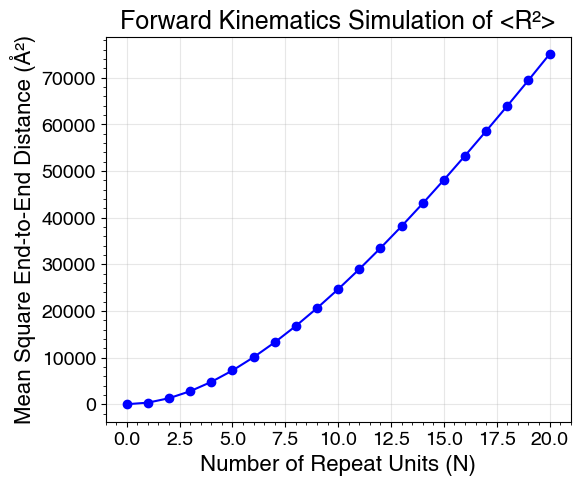

array([    0.        ,   336.35240193,  1288.63431694,  2791.30058846,
        4788.27697638,  7231.87343754, 10073.92654357, 13270.6554518 ,
       16788.58315541, 20599.82175171, 24660.96139122, 28962.50002717,
       33472.19813761, 38158.41292739, 43040.20391167, 48080.93573652,
       53266.4988933 , 58567.02091854, 63949.91902379, 69446.15402127,
       75045.01872321])

In [3]:
a = pp.PolymerPersistenceMulti([0.8, 0.2], [l1, l2], [Angle1, Angle2],
                                 temperature, [rotation1, rotation2], labels)
a.calc_mean_square_end_to_end_distance(20, 50000, True, True)

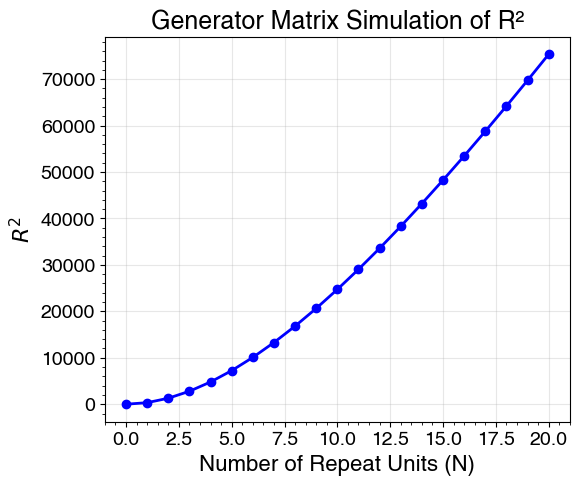

array([    0.        ,   336.36016355,  1288.70869545,  2792.24567151,
        4791.05023987,  7235.37704863, 10080.59894428, 13286.58846559,
       16817.24183059, 20640.07006637, 24725.83577576, 29048.22739481,
       33583.56632336, 38310.54342915, 43209.98193574, 48264.62404138,
       53458.93889157, 58778.94976743, 64212.07856706, 69747.00584925,
       75373.54488233])

In [4]:
r2 = [pp.compute_r2_terpolymer_Tscan([p1, p2], [[0.8, 0.2]], [300], x, False)[0, 0] for x in np.arange(21)]
plt.figure(figsize=(6, 5))
plt.plot(np.arange(21), r2, 'bo-', linewidth=2)
pp.format_subplot("Number of Repeat Units (N)", "$R^2$",
                    "Generator Matrix Simulation of R²")
plt.show()
np.array(r2)

In [5]:
res1 = pp.compute_r2_terpolymer_Tscan([p1, p2], [[0.8, 0.2]], [300], 20)

-------------- Calculation Report -------------
Temperature: 300.00 K
Mean Square End-to-End Distance: 75373.544882
-----------------------------------------------


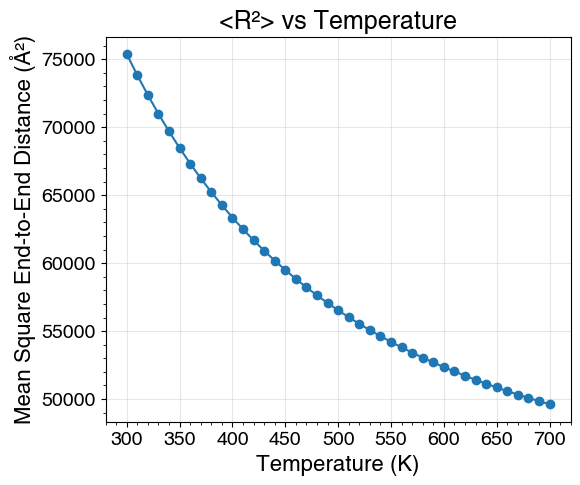

In [6]:
res2 = pp.compute_r2_terpolymer_Tscan([p1, p2], [[0.8, 0.2]], np.linspace(300, 700, 41), 20)

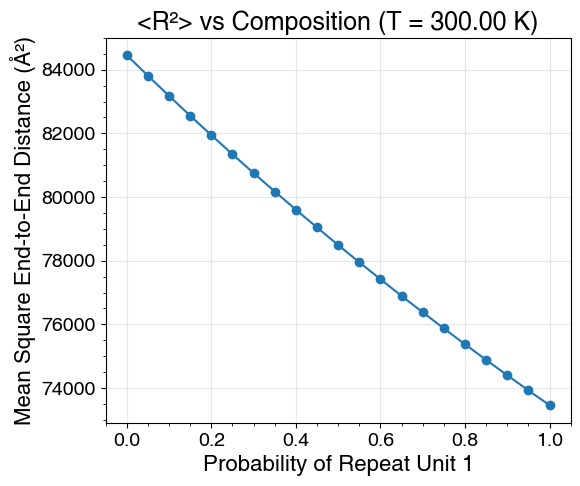

In [7]:
res3 = pp.compute_r2_terpolymer_Tscan([p1, p2], [[x, 1-x] for x in np.linspace(0, 1, 21)], [300], 20)

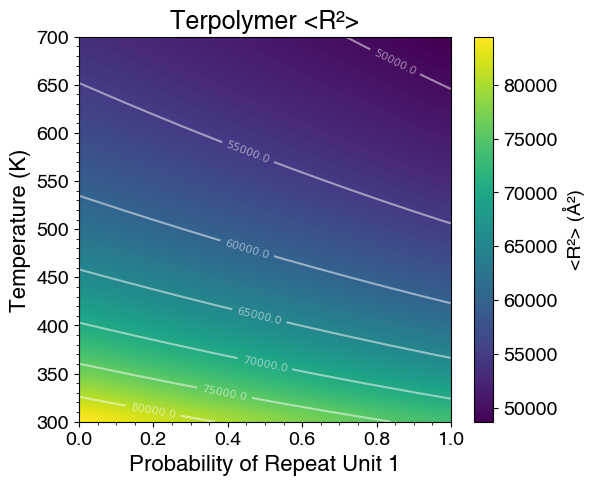

In [8]:
res4 = pp.compute_r2_terpolymer_Tscan([p1, p2], [[x, 1-x] for x in np.linspace(0, 1, 21)], np.linspace(300, 700, 41), 20)